# Simple Polynomial Regression

### Dataset: 
```
https://icarus.cs.weber.edu/~hvalle/cs4580/data/FuelConsumptionCo2.csv
```

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np


In [59]:
df = pd.read_csv('../data/FuelConsumptionCo2.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [22]:
# Select some features to explore
cdf = df[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
cdf.head(9)

,CYLINDERS,ENGINESIZE,CO2EMISSIONS,FUELCONSUMPTION_COMB
0,4,2.0,196,8.5
1,4,2.4,221,9.6
2,4,1.5,136,5.9
3,6,3.5,255,11.1
4,6,3.5,244,10.6
5,6,3.5,230,10.0
6,6,3.5,232,10.1
7,6,3.7,255,11.1
8,6,3.7,267,11.6


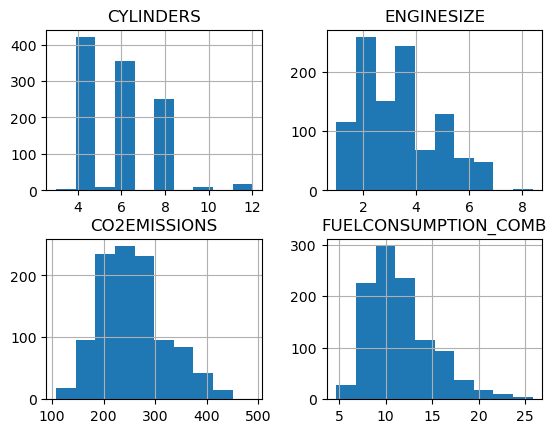

In [27]:
# histogram
viz = cdf[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

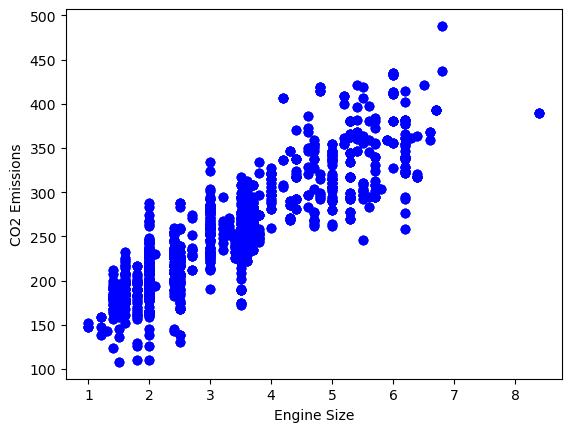

In [32]:
#viz = cdf[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

### Create train and test dataset

Create two sets that are mutually exclusive, after which you will train your engine with the train set, and test it with the test set

In [34]:
# Split data
msk = np.random.rand(len(df)) < 0.8 # select 80% of the data
train = cdf[msk] # 80%
test = cdf[~msk] # 20%

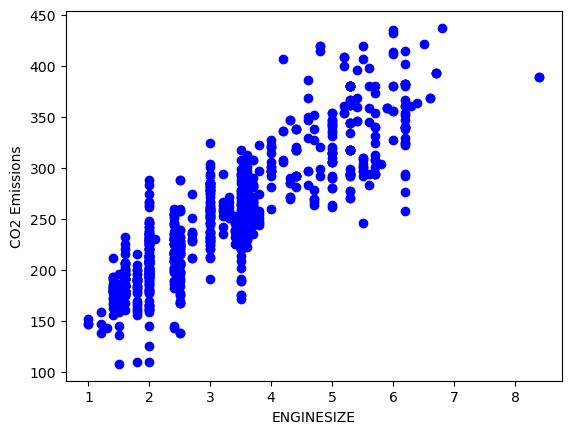

In [35]:
# See the train data distribution
# plot these features vs emissions
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2 Emissions')
plt.show()

In [41]:
# Model your Linear Regression on your train set
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asarray(train[['ENGINESIZE']]) # 2d array
train_y = np.asarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y) # fit the model
print(f'Coefficient: {regr.coef_}')
print(f'Intercept: {regr.intercept_}')

Coefficient: [[38.43411147]]
Intercept: [126.91341745]


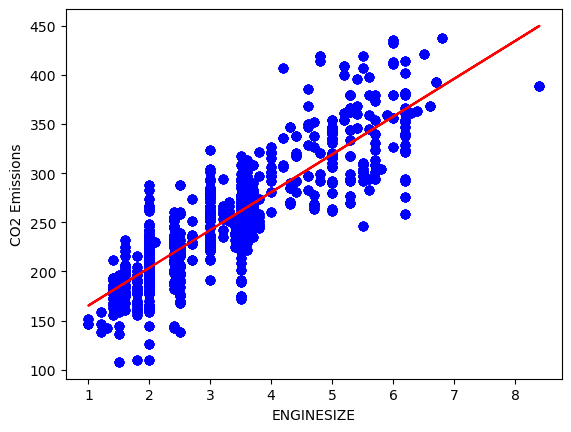

In [47]:
# Fit the plot
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2 Emissions')
# coef_ is 2D, intercept is 1D
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') #2d
plt.show()

In [50]:
# Do the evaluation:
# Mean Absolute Error, Residual Square Error, R-Square
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print(f'Mean Absolute Error: {np.mean(np.absolute(test_y_ - test_y))}')
print(f'MSE: {np.mean(test_y_ - test_y)**2}')
print(f'R2-Score: {r2_score(test_y, test_y_)}')

Mean Absolute Error: 24.184032492422705
MSE: 11.024414684195262
R2-Score: 0.7699702804553302


### TASK: Repeat the same process using `FUELCONSUMPTION_COMB` and `CO2EMISSIONS`

In [51]:

test_x2 = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y2 = np.asanyarray(test[['CO2EMISSIONS']])
test_y2_ = regr.predict(test_x2)

print(f'Mean Absolute Error: {np.mean(np.absolute(test_y2_ - test_y2))}')
print(f'MSE: {np.mean(test_y2_ - test_y2)**2}')
print(f'R2-Score: {r2_score(test_y2, test_y2_)}')

Mean Absolute Error: 330.5802915691843
MSE: 109283.3291739669
R2-Score: -25.207325357239082


## Multiple Regression Model

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

x = np.asarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asarray(train[['CO2EMISSIONS']])
regr.fit(x, y)
print(f'Coefficients: {regr.coef_}') # now we have 3 coefficients

Coefficients: [[11.1110083   6.21555497 10.14149998]]


In [58]:
# Get your prediction
y_hat = regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print(f'MSE: {np.mean((y_hat - y)**2)}')
print(f'Variance Score: {regr.score(x, y)}')


MSE: 675.6395880135836
Variance Score: 0.850036913284487


c:\Users\K\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### TASK: Try Multiple Linear Regression Using: `FUELCONSUMPTION_CITY` and `FUELCONSUMPTION_HWY` instead of `FUEL_CONSUMPTION_COMB`

Does it result in better accuracy?

## Polynomial Regression

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

df = pd.read_csv('../data/FuelConsumptionCo2.csv')
#df.head()

# Split the data
msk = np.random.rand(len(df)) < 0.8 # select 80% of the data
train = cdf[msk] # 80%
test = cdf[~msk] # 20%

In [64]:
# Create your linear model
clf = linear_model.LinearRegression()
train_y = clf.fit(train_x_poly, train_y)
# Coefficients
print(f'Coefficients: {clf.coef_}')
print(f'Intercept: {clf.intercept_}')

NameError: name 'train_x_poly' is not defined